In [1]:
## imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.ndimage import convolve
import skimage


np.random.seed(0)

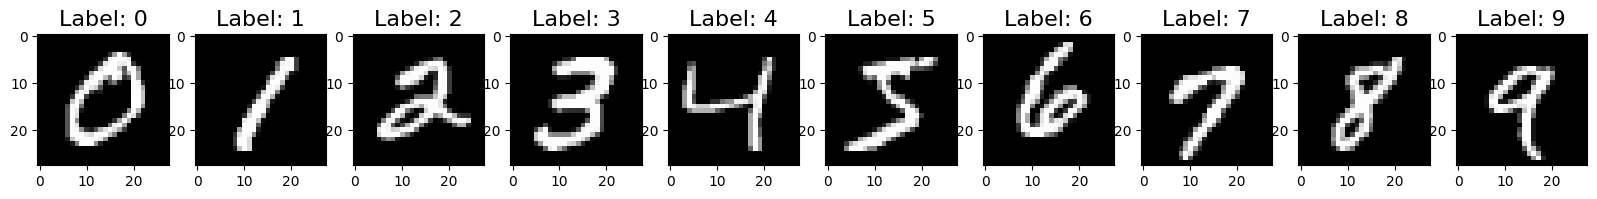

In [2]:
## import for dataset
from keras.datasets import mnist

## x_train is feature, y_train is labels
## x_test is feature, y_test is labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [3]:
def get_pools(img: np.array, pool_size: int, stride: int) -> np.array:
    # To store individual pools
    pools = []
    
    # Iterate over all row blocks (single block has `stride` rows)
    for i in np.arange(img.shape[0], step=stride):
        # Iterate over all column blocks (single block has `stride` columns)
        for j in np.arange(img.shape[0], step=stride):
            
            # Extract the current pool
            mat = img[i:i+pool_size, j:j+pool_size]
            
            # Make sure it's rectangular - has the shape identical to the pool size
            if mat.shape == (pool_size, pool_size):
                # Append to the list of pools
                pools.append(mat)
                
    # Return all pools as a Numpy array
    return np.array(pools)

def max_pooling(pools: np.array) -> np.array:
    # Total number of pools
    num_pools = pools.shape[0]
    # Shape of the matrix after pooling - Square root of the number of pools
    tgt_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))
    # To store the max values
    pooled = []
    
    # Iterate over all pools
    for pool in pools:
        # Append the max value only
        pooled.append(np.max(pool))
        
    # Reshape to target shape
    return np.array(pooled).reshape(tgt_shape)

<function matplotlib.pyplot.show(close=None, block=None)>

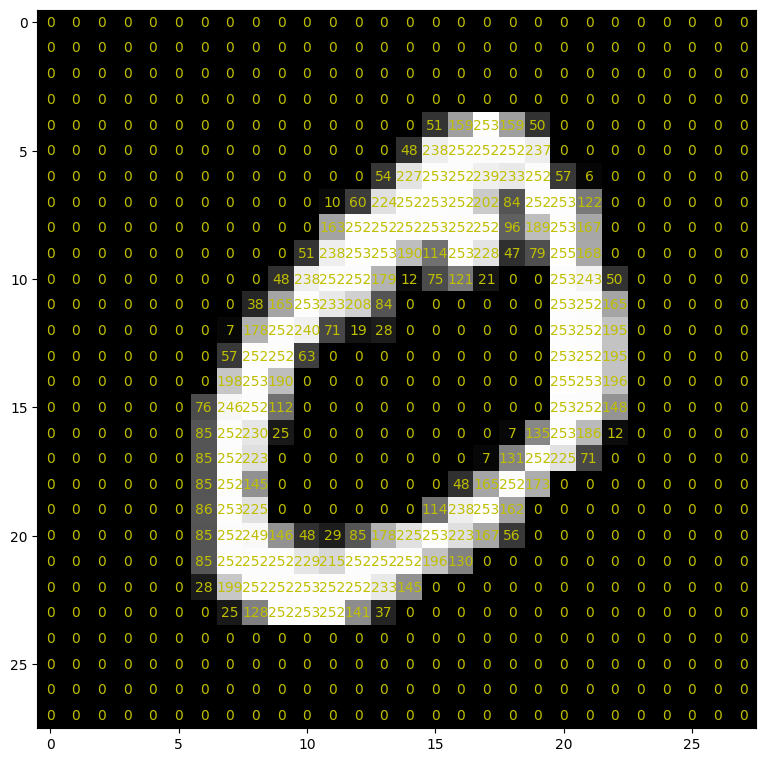

In [4]:
# sample = x_train[y_train == i][j]
# where i is the feature, and j is the label
feature = 0
label = 0

(x_train, y_train), (x_test, y_test) = mnist.load_data()
input = x_train[y_train == feature][label]

#getting the shape
w, h = input.shape

## plotting picture with pixel values
fig, ax = plt.subplots(figsize=(w/3,h/3))
ax.imshow(input, cmap='gray')

for i in range(input.shape[0]):
    for j in range(input.shape[1]):
        ax.text(j, i, str(input[i, j]), color='y', ha='center', va='center')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

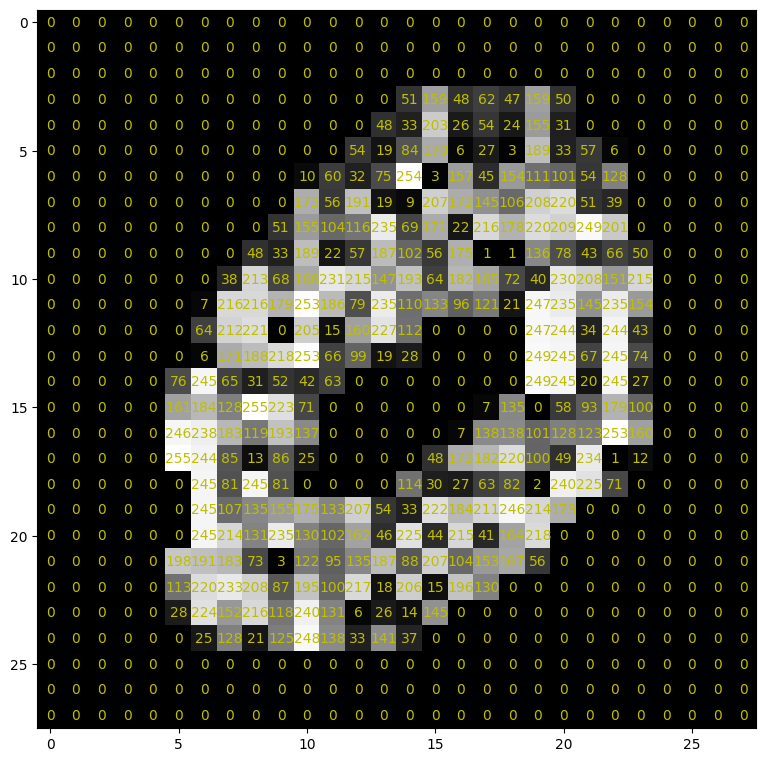

In [5]:
## kernel declaration
kernel = [[1, 0, 1],
          [1, 0, 1],
          [1, 0, 1]]

## convolution
vertical = convolve(input, kernel)

## getting the shape
w, h = vertical.shape

## plotting picture with pixel values
fig, ax = plt.subplots(figsize=(w/3,h/3))
ax.imshow(vertical, cmap='gray')

for i in range(vertical.shape[0]):
    for j in range(vertical.shape[1]):
        ax.text(j, i, str(vertical[i, j]), color='y', ha='center', va='center')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

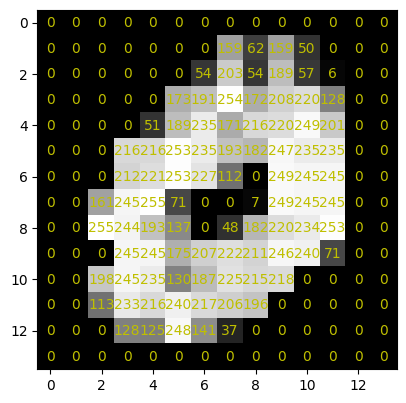

In [6]:
## get the max pool
vertical_pool = get_pools(img=np.array(vertical), pool_size=2, stride=2)
vertical_max_pool = max_pooling(pools=vertical_pool)

## getting the shape
w, h = vertical_max_pool.shape

## plotting picture with pixel values
fig, ax = plt.subplots(figsize=(w/3,h/3))
ax.imshow(vertical_max_pool, cmap='gray')

for i in range(vertical_max_pool.shape[0]):
    for j in range(vertical_max_pool.shape[1]):
        ax.text(j, i, str(vertical_max_pool[i, j]), color='y', ha='center', va='center')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

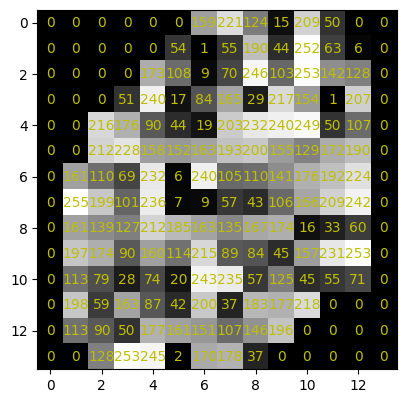

In [7]:
## kernel declaration
kernel = [[1, 1, 1],
          [0, 0, 0],
          [1, 1, 1]]

## convolution
horizontal = convolve(vertical_max_pool, kernel)

## getting the shape
w, h = horizontal.shape

## plotting picture with pixel values
fig, ax = plt.subplots(figsize=(w/3,h/3))
ax.imshow(horizontal, cmap='gray')

for i in range(horizontal.shape[0]):
    for j in range(horizontal.shape[1]):
        ax.text(j, i, str(horizontal[i, j]), color='y', ha='center', va='center')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

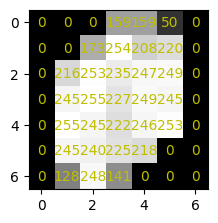

In [9]:
## get the max pool
horizontal_pool = get_pools(img=np.array(vertical_max_pool), pool_size=2, stride=2)
horizontal_max_pool = max_pooling(pools=horizontal_pool)

## getting the shape
w, h = horizontal_max_pool.shape

## plotting picture with pixel values
fig, ax = plt.subplots(figsize=(w/3,h/3))
ax.imshow(horizontal_max_pool, cmap='gray')

for i in range(horizontal_max_pool.shape[0]):
    for j in range(horizontal_max_pool.shape[1]):
        ax.text(j, i, str(horizontal_max_pool[i, j]), color='y', ha='center', va='center')

plt.show

In [10]:
## pool_size = input_size - (kernel_size -1)

print('input: ',input.shape)
print('vertical: ', vertical.shape)
print('v_pooling: ', vertical_max_pool.shape)
print('horizontal: ', horizontal.shape)
print('h_pooling: ', horizontal_max_pool.shape)

input:  (28, 28)
vertical:  (28, 28)
v_pooling:  (14, 14)
horizontal:  (14, 14)
h_pooling:  (7, 7)
